In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet50, inception_v3, densenet121, mobilenet_v2, convnext_tiny
import torch.optim as optim
from torch_funcs import inception_fit, fit, test, get_cifar10_loaders, get_mnist_loaders, FullyConnectedNet

In [3]:
# config
batch_size = 4
test_batch_size = 8
epochs = 2
lr = 1e-3
momentum = 0.9
loss_func = F.cross_entropy
num_classes = 10
log_interval = 500

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

train_dl, test_dl = get_cifar10_loaders(batch_size, test_batch_size)

CUDA enabled: True
Files already downloaded and verified
Files already downloaded and verified


Important thing to remember here is that basically no nets can work on CIFAR-10 dataset direclty as 32x32 images are too
small. That's why `get_cifar10_loaders` internally resizes all pictures to (by default) 224x224 pixels to meet the
requirements as suggested
[here](https://discuss.pytorch.org/t/given-input-size-256x1x1-calculated-output-size-256x0x0/40941). 
  
This input transform shall be repeated for all technologies examined in this paper.

In [4]:
def whole_thing(predef_model):
	opt = optim.SGD(predef_model.parameters(), lr=lr, momentum=momentum)

	train_history = []
	acc_history = []

	for epoch in range(1, epochs + 1):
		train_history.extend( fit(predef_model, device, train_dl, loss_func, epoch, optimizer=opt, log_interval=log_interval, silent=False) )
		acc_history.append( test(predef_model, device, test_dl, loss_func, silent=True) )

	fig, (ax1, ax2) = plt.subplots(1, 2)
	fig.set_size_inches(12.8, 4.8)

	ax1.plot(train_history)
	ax1.set_title('Training history')

	ax2.plot(acc_history)
	ax2.set_title('Accuracy history')

	del opt, train_history, acc_history

In [5]:
print('ResNet50 - 2015')

model = resnet50()
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model) 

del model # explicit deletion as GC doesn't seem to free VRAM

ResNet50 - 2015
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 3.323094


Files already downloaded and verified
Files already downloaded and verified
Inception v3 - 2016
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 3.310186
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 3.078609
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.933313
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.834825
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.832620
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 2.710128
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 2.709156
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 2.601177
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 2.558143
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 2.512272
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 2.436540
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 2.443759
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 2.340620
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 2.326070
Tra

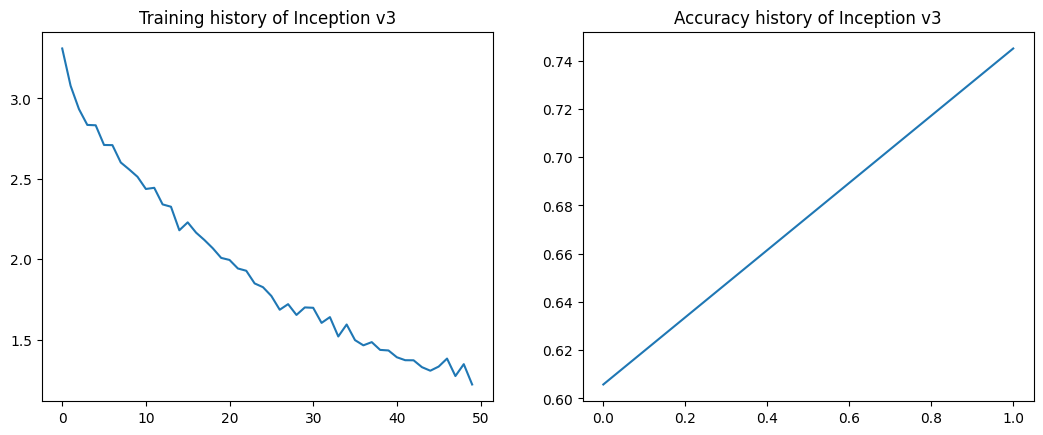

In [4]:
print('Inception v3 - 2016')

model = inception_v3(init_weights=False)
model.AuxLogits.fc = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
model = model.to(device)

inception_train_dl, inception_test_dl = get_cifar10_loaders(batch_size, test_batch_size, 299)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( inception_fit(model, device, inception_train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, inception_test_dl, loss_func, silent=True) )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax1.plot(train_history)
ax1.set_title('Training history')

ax2.plot(acc_history)
ax2.set_title('Accuracy history')

del model, opt, train_history, acc_history, inception_train_dl, inception_test_dl

Densenet-121 - 2018
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.192305
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.056251
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 1.989142
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 1.930806
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 1.897077
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 1.846990
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 1.850480
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 1.803314
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 1.740173
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 1.704523
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 1.674271
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 1.696304
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 1.669693
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 1.675360
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 1.576320
Train Epoch: 1

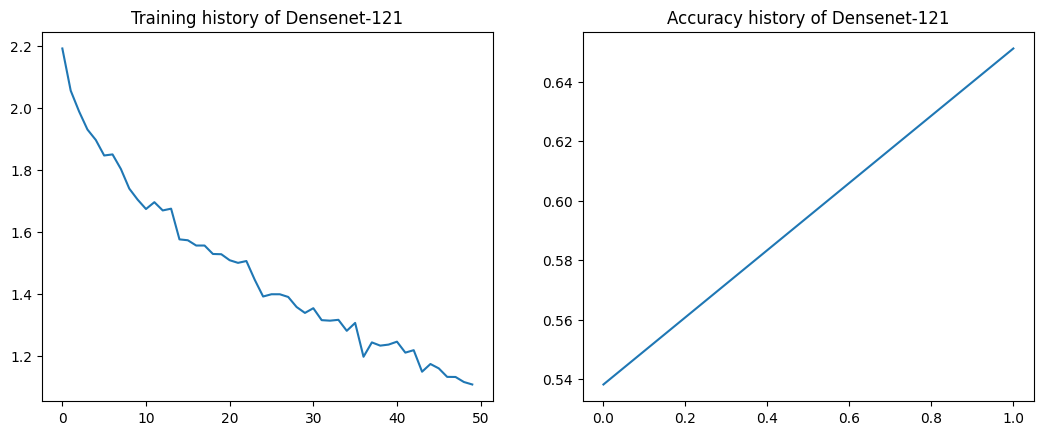

In [5]:
model = densenet121()
model.classifier = nn.Linear(in_features=1024, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

MobileNet v2 - 2019
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.236747
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.133040
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.097264
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.052670
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.006835
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 1.967154
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 1.952389
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 1.959744
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 1.854098
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 1.859602
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 1.829231
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 1.803613
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 1.733310
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 1.754815
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 1.687621
Train Epoch: 1

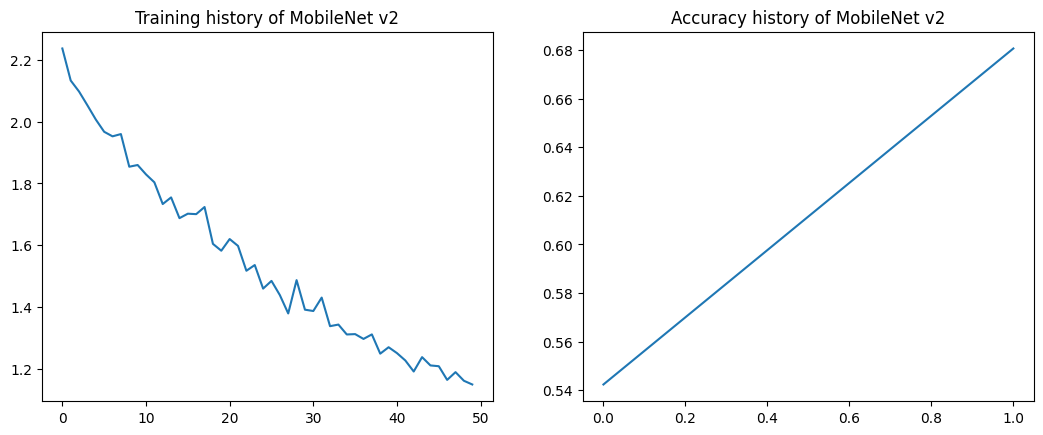

In [6]:
model = mobilenet_v2()
model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

ConvNeXt Tiny - 2020
Train Epoch: 1 -> batch: 499 [1996/50000 (4%)]	Loss: 2.752737
Train Epoch: 1 -> batch: 999 [3996/50000 (8%)]	Loss: 2.518624
Train Epoch: 1 -> batch: 1499 [5996/50000 (12%)]	Loss: 2.515707
Train Epoch: 1 -> batch: 1999 [7996/50000 (16%)]	Loss: 2.440978
Train Epoch: 1 -> batch: 2499 [9996/50000 (20%)]	Loss: 2.377812
Train Epoch: 1 -> batch: 2999 [11996/50000 (24%)]	Loss: 2.217335
Train Epoch: 1 -> batch: 3499 [13996/50000 (28%)]	Loss: 2.094124
Train Epoch: 1 -> batch: 3999 [15996/50000 (32%)]	Loss: 2.117848
Train Epoch: 1 -> batch: 4499 [17996/50000 (36%)]	Loss: 2.066882
Train Epoch: 1 -> batch: 4999 [19996/50000 (40%)]	Loss: 2.049053
Train Epoch: 1 -> batch: 5499 [21996/50000 (44%)]	Loss: 2.026766
Train Epoch: 1 -> batch: 5999 [23996/50000 (48%)]	Loss: 2.039127
Train Epoch: 1 -> batch: 6499 [25996/50000 (52%)]	Loss: 2.045200
Train Epoch: 1 -> batch: 6999 [27996/50000 (56%)]	Loss: 2.031170
Train Epoch: 1 -> batch: 7499 [29996/50000 (60%)]	Loss: 2.033958
Train Epoch: 

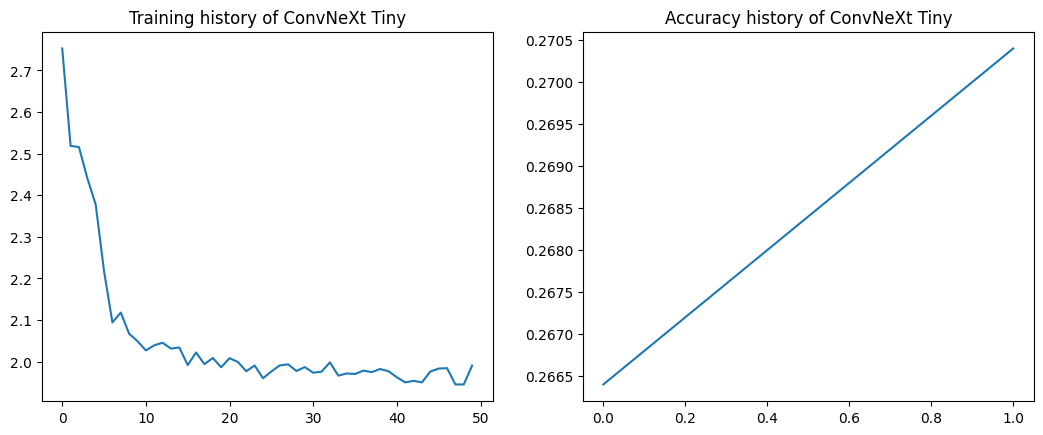

In [7]:
model = convnext_tiny()
model.classifier[2] = nn.Linear(in_features=768, out_features=num_classes, bias=True)
model = model.to(device)

whole_thing(model)

del model

Fully connected MLP - Simard et al. 2003
Train Epoch: 1 -> batch: 399 [25536/60000 (43%)]	Loss: 0.695807
Train Epoch: 1 -> batch: 799 [51136/60000 (85%)]	Loss: 0.401803
Train Epoch: 2 -> batch: 399 [25536/60000 (43%)]	Loss: 0.308407
Train Epoch: 2 -> batch: 799 [51136/60000 (85%)]	Loss: 0.273460
Train Epoch: 3 -> batch: 399 [25536/60000 (43%)]	Loss: 0.239998
Train Epoch: 3 -> batch: 799 [51136/60000 (85%)]	Loss: 0.216160
Train Epoch: 4 -> batch: 399 [25536/60000 (43%)]	Loss: 0.194407
Train Epoch: 4 -> batch: 799 [51136/60000 (85%)]	Loss: 0.183832
Train Epoch: 5 -> batch: 399 [25536/60000 (43%)]	Loss: 0.166376
Train Epoch: 5 -> batch: 799 [51136/60000 (85%)]	Loss: 0.156249


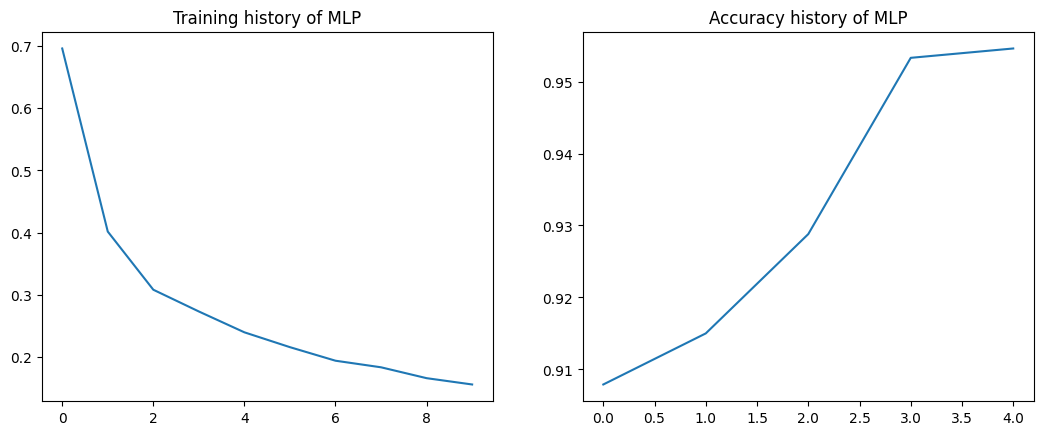

In [10]:
# config
fc_batch_size = 64
fc_test_batch_size = 128
epochs = 5
lr = 1e-2
momentum = 0.9
log_interval = 400
loss_func = F.nll_loss # FCNet return log_softmax -> with nll eq to cross entropy

train_dl, _, test_dl = get_mnist_loaders(fc_batch_size, fc_test_batch_size)

model = FullyConnectedNet().to(device)
opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

print('Fully connected MLP - Simard et al. 2003')
for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, opt, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history of MLP')
ax_test.set_title('Accuracy history of MLP')

del model, opt, train_history, acc_history